## Analisi delle Abitudini Legate alla Salute e all'Alimentazione

### Introduzione
Progetto creato da Umberto Schiavone in data 10/06/2024, si propone di esplorare e analizzare diversi aspetti delle abitudini legate alla salute e all'alimentazione. L'obiettivo è comprendere le tendenze e le differenze nella distribuzione di fattori come il consumo di tabacco, l'uso di farmaci, l'alimentazione, il peso corporeo e lo stato di salute, nelle diverse fasce di età e tra i sessi.

Fonti:

Istat

In [137]:
##INSTALLING LIBRARIES
#Commented to save some execution time
#pip install numpy pandas matplotlib pyarrow

In [138]:
##SETUP
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Read and store every DB
df_smoking = pd.read_csv("dataset\\fumo.csv",encoding="utf-8",delimiter=",")
bevande_df = pd.read_csv("dataset\\bevande.csv", encoding="utf-8",delimiter=",")
df_massacorporea = pd.read_csv("dataset\\massacorporea.csv", encoding="utf-8",delimiter=",")
df_salumi = pd.read_csv("dataset\\salumi.csv", encoding="utf-8",delimiter=",")
df_stato_salute = pd.read_csv("dataset\statosalute.csv", encoding="utf-8",delimiter=",")
df_farmaci = pd.read_csv("dataset\\farmaci.csv", encoding="utf-8",delimiter=",")

<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\s'
C:\Users\066151758\AppData\Local\Temp\ipykernel_9132\3321101790.py:12: SyntaxWarning: invalid escape sequence '\s'
  df_stato_salute = pd.read_csv("dataset\statosalute.csv", encoding="utf-8",delimiter=",")


### Distribuzione delle Abitudini al Fumo per Età e Anno
L'analisi della distribuzione delle abitudini al fumo rivela interessanti tendenze nel corso degli anni e tra le diverse fasce di età. Dai grafici, emerge un declino generale nel consumo di tabacco, con una diminuzione più marcata nelle fasce di età più giovani. Tuttavia, vengono osservate variazioni significative tra i diversi gruppi demografici, suggerendo la necessità di strategie mirate di prevenzione e riduzione del consumo di tabacco.


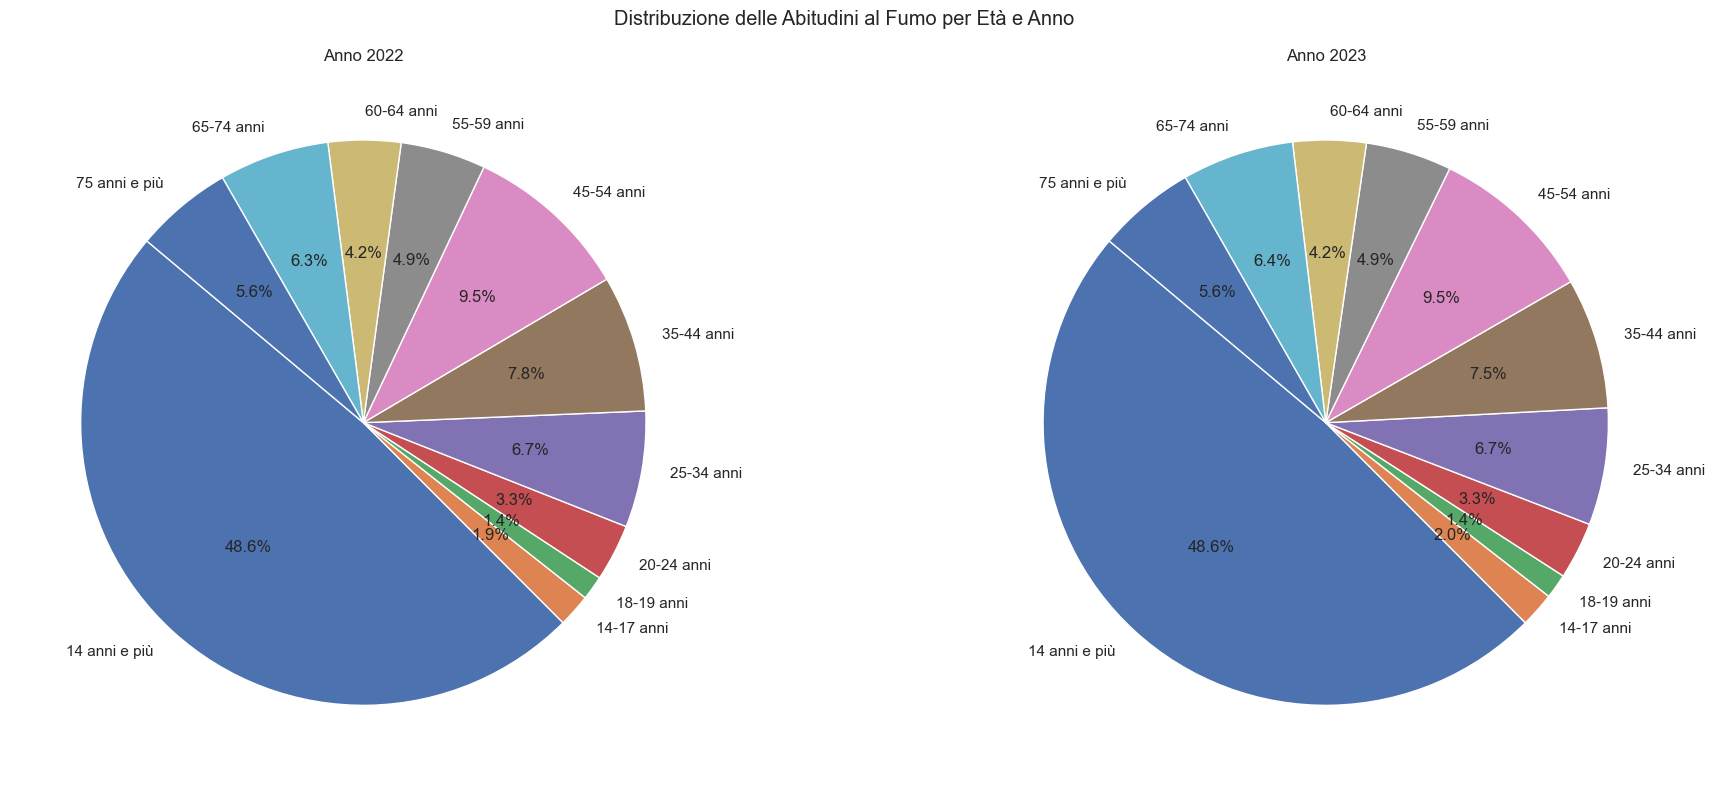

In [139]:
# Display the first few rows of the dataframe to understand its structure
df_smoking.head()

# Raggruppa i dati per anno e classe di età
df_smoking_grouped = df_smoking.groupby(['TIME', 'Classe di età'])['Value'].sum().reset_index()

# Crea grafici a torta per ciascun anno
years = df_smoking_grouped['TIME'].unique()
fig, axes = plt.subplots(1, len(years), figsize=(20, 8), subplot_kw=dict(aspect="equal"))

for i, year in enumerate(years):
    data = df_smoking_grouped[df_smoking_grouped['TIME'] == year]
    axes[i].pie(data['Value'], labels=data['Classe di età'], autopct='%1.1f%%', startangle=140)
    axes[i].set_title(f'Anno {year}')

plt.suptitle('Distribuzione delle Abitudini al Fumo per Età e Anno')

# Mostra il grafico
plt.tight_layout()
plt.show()

### Consumo di Aperitivi, Amari e Liquori per Età e Sesso (2022 vs 2023)
L'analisi del consumo di aperitivi, amari e liquori evidenzia differenze significative tra i due anni presi in considerazione. Si osserva un aumento del consumo in alcune fasce di età nel 2023 rispetto al 2022, con variazioni anche tra i sessi. Questo suggerisce la possibilità di cambiamenti nelle abitudini di consumo legate agli stili di vita e alla cultura alimentare, che potrebbero richiedere un'attenzione particolare nelle politiche di salute pubblica.


C:\Users\066151758\AppData\Local\Temp\ipykernel_9132\3654451716.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=bevande_filtered_df, x='TIME', y='Value', hue='Sesso', ci=None, palette='muted')


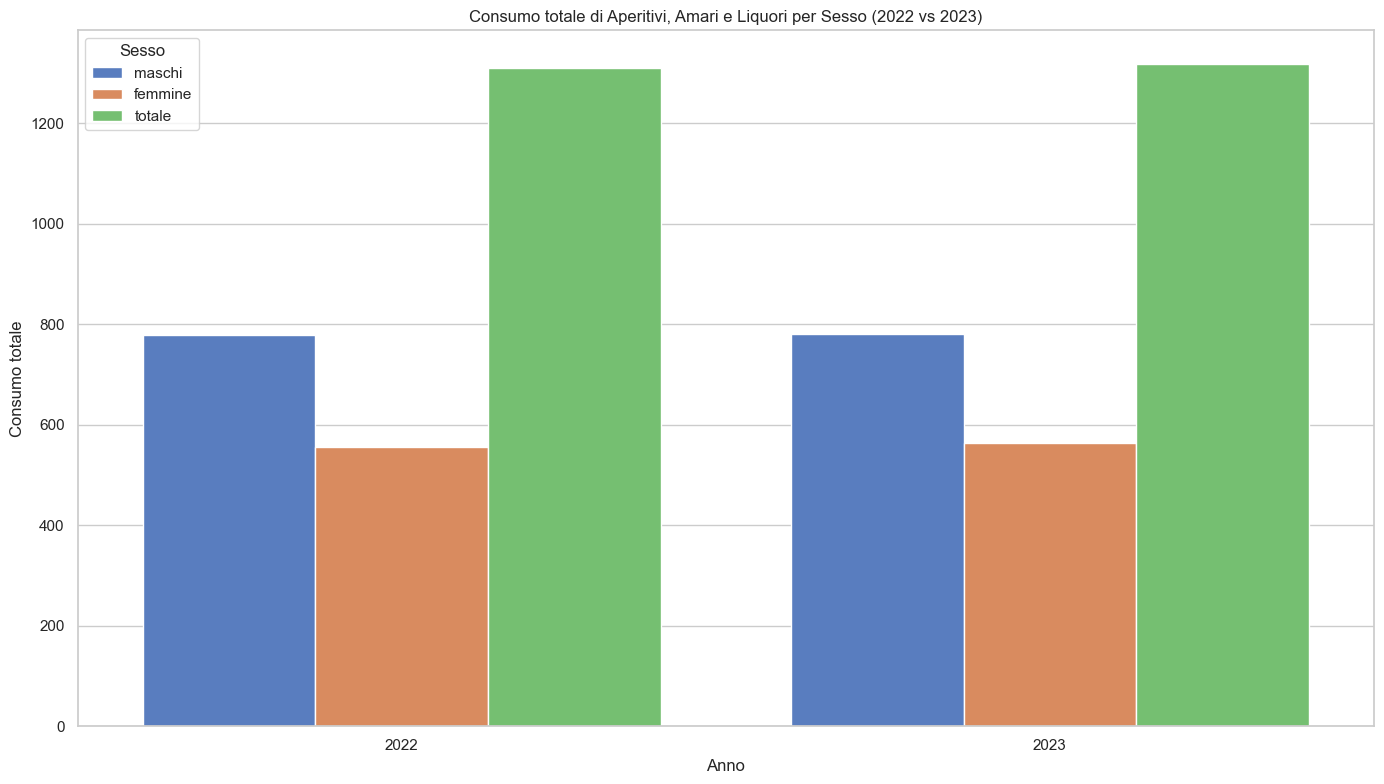

In [140]:
# Display the first few rows of the dataframe to understand its structure
bevande_df.head()

# Filtra i dati per gli anni 2022 e 2023
bevande_filtered_df = bevande_df[bevande_df['TIME'].isin([2022, 2023])]

# Crea un grafico a linea
plt.figure(figsize=(14, 8))
sns.barplot(data=bevande_filtered_df, x='TIME', y='Value', hue='Sesso', ci=None, palette='muted')

plt.xlabel('Anno')
plt.ylabel('Consumo totale')
plt.title('Consumo totale di Aperitivi, Amari e Liquori per Sesso (2022 vs 2023)')
plt.legend(title='Sesso')

# Mostra il grafico
plt.tight_layout()
plt.show()


### Distribuzione dell'Indice di Massa Corporea e Controllo del Peso per Sesso e Anno
L'analisi dell'indice di massa corporea (BMI) e del controllo del peso mostra tendenze interessanti nel corso degli anni e tra i sessi. Dai dati emerge una distribuzione differenziata del peso corporeo tra uomini e donne, con variazioni significative nel corso del tempo. Questo solleva questioni importanti sulla salute e sul benessere, suggerendo la necessità di interventi mirati per promuovere stili di vita sani e controllare l'obesità.


C:\Users\066151758\AppData\Local\Temp\ipykernel_9132\982732129.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_massacorporea_grouped, x='Sesso', y='Value', hue='Tipo dato', ci=None, palette='muted')


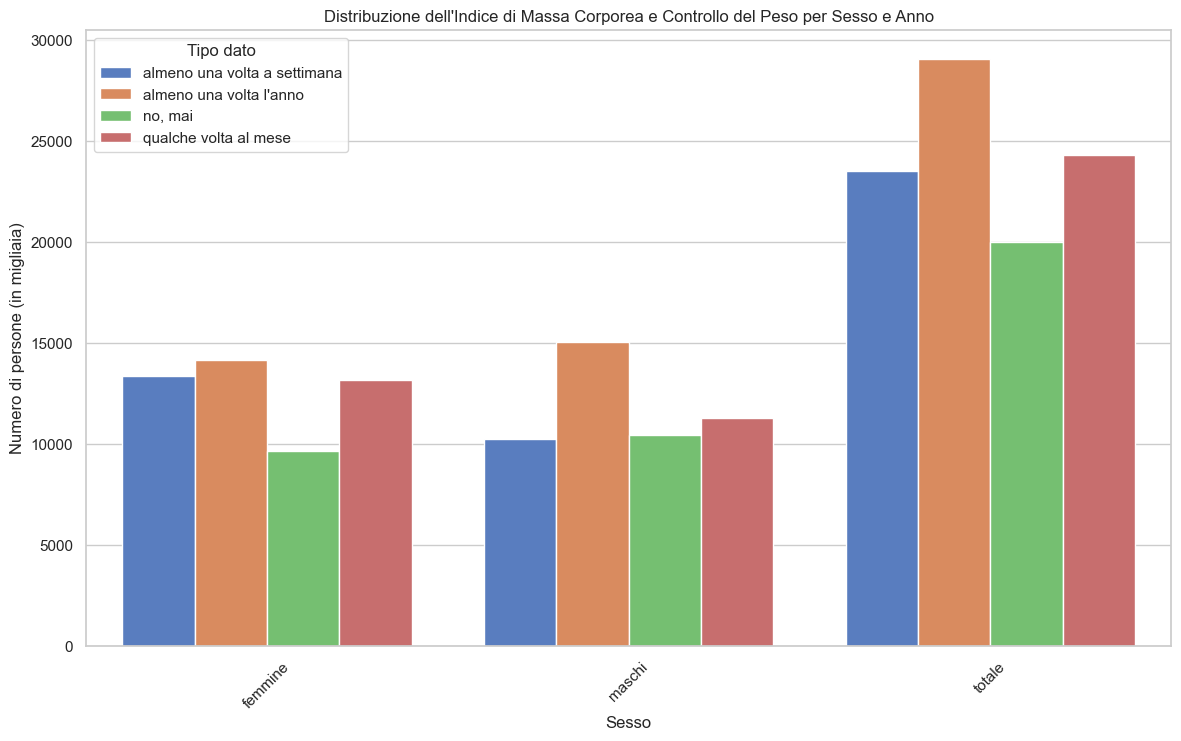

In [141]:
# Display the first few rows of the dataframe to understand its structure
df_massacorporea.head()

# Raggruppa i dati per creare il grafico
df_massacorporea_grouped = df_massacorporea.groupby(['Tipo dato', 'Sesso', 'TIME'])['Value'].sum().reset_index()

# Imposta il contesto per i grafici
sns.set(style="whitegrid")

# Crea un grafico a barre per visualizzare i dati
plt.figure(figsize=(14, 8))
sns.barplot(data=df_massacorporea_grouped, x='Sesso', y='Value', hue='Tipo dato', ci=None, palette='muted')

# Aggiunge etichette e titolo
plt.xlabel('Sesso')
plt.ylabel('Numero di persone (in migliaia)')
plt.title('Distribuzione dell\'Indice di Massa Corporea e Controllo del Peso per Sesso e Anno')
plt.legend(title='Tipo dato')

# Mostra il grafico
plt.xticks(rotation=45)
plt.show()

### Consumo di Salumi, Carni, Uova e Pesce per Età e Sesso (2022 vs 2023)
L'analisi del consumo di alimenti come salumi, carni, uova e pesce rivela variazioni significative tra i due anni considerati. Si osservano cambiamenti nei modelli di consumo alimentare, con possibili implicazioni sulla salute e sulle abitudini alimentari della popolazione. È importante approfondire la comprensione di questi cambiamenti per sviluppare strategie efficaci di promozione della salute e di prevenzione delle malattie.


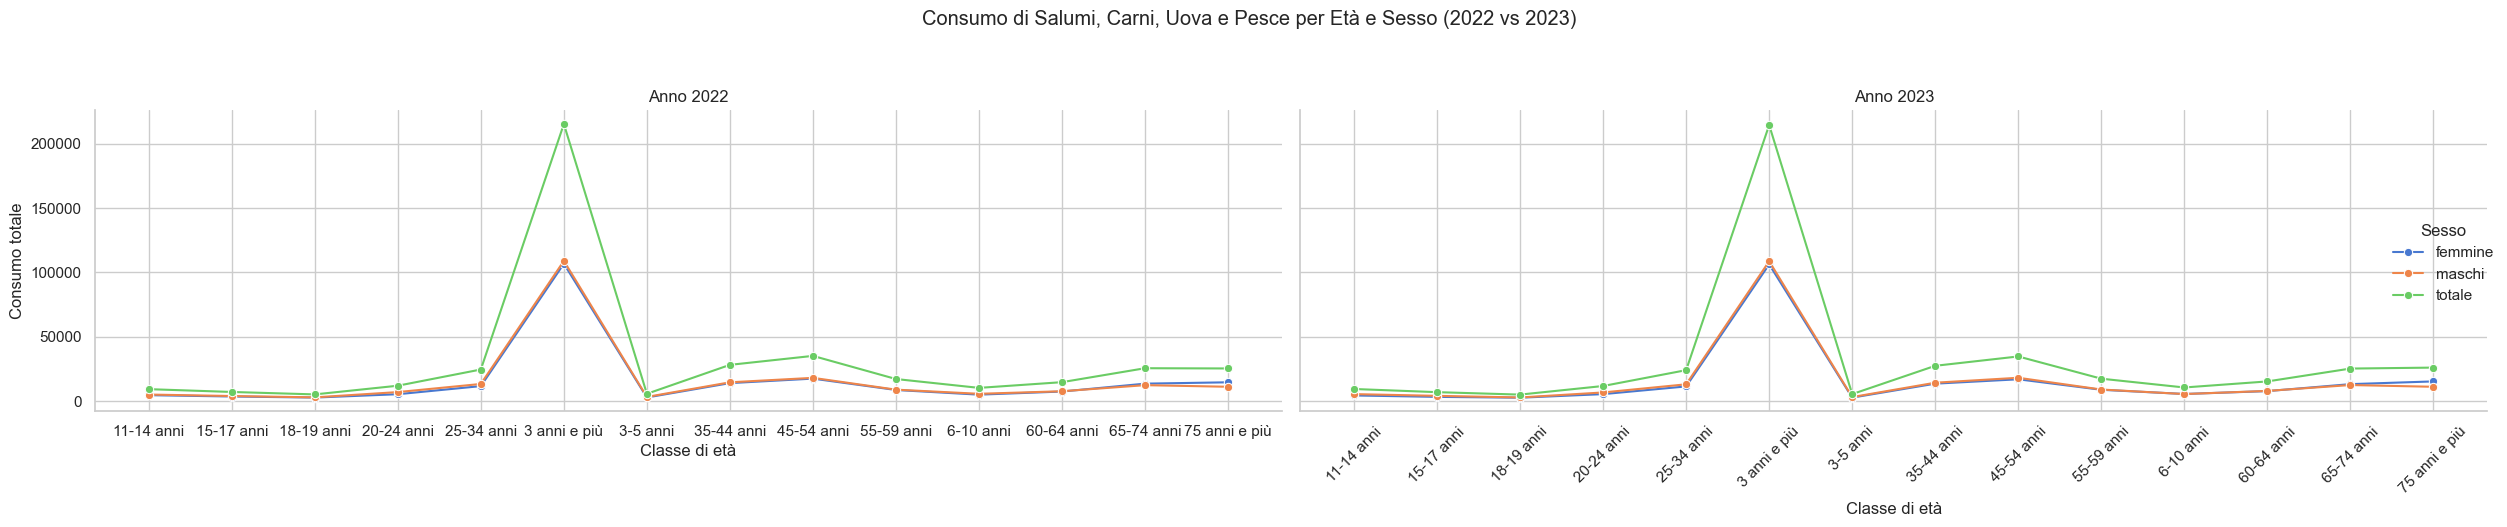

In [142]:
# Display the first few rows of the dataframe to understand its structure
df_salumi.head()

# Filtra i dati per gli anni 2022 e 2023
df_salumi_filtered = df_salumi[df_salumi['TIME'].isin([2022, 2023])]

# Raggruppa i dati per classe di età, sesso e anno
df_salumi_grouped = df_salumi_filtered.groupby(['TIME', 'Classe di età', 'Sesso'])['Value'].sum().reset_index()

g = sns.FacetGrid(df_salumi_grouped, col="TIME", hue="Sesso", height=5, aspect=2.4, palette='muted')
g.map(sns.lineplot, "Classe di età", "Value", marker='o')
g.add_legend()

# Aggiunge etichette e titolo
g.set_axis_labels("Classe di età", "Consumo totale")
g.set_titles("Anno {col_name}")
g.fig.suptitle("Consumo di Salumi, Carni, Uova e Pesce per Età e Sesso (2022 vs 2023)", y=1.05)

# Mostra il grafico
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Distribuzione delle Malattie Croniche per Sesso e Classe di Età
L'analisi della distribuzione delle malattie croniche fornisce un quadro delle sfide legate alla salute affrontate dalla popolazione. Si osservano differenze significative tra i sessi e le diverse fasce di età, con alcune patologie che colpiscono più frequentemente determinati gruppi demografici. Questo sottolinea l'importanza della prevenzione e della gestione delle malattie croniche attraverso interventi mirati e politiche sanitarie adeguate.


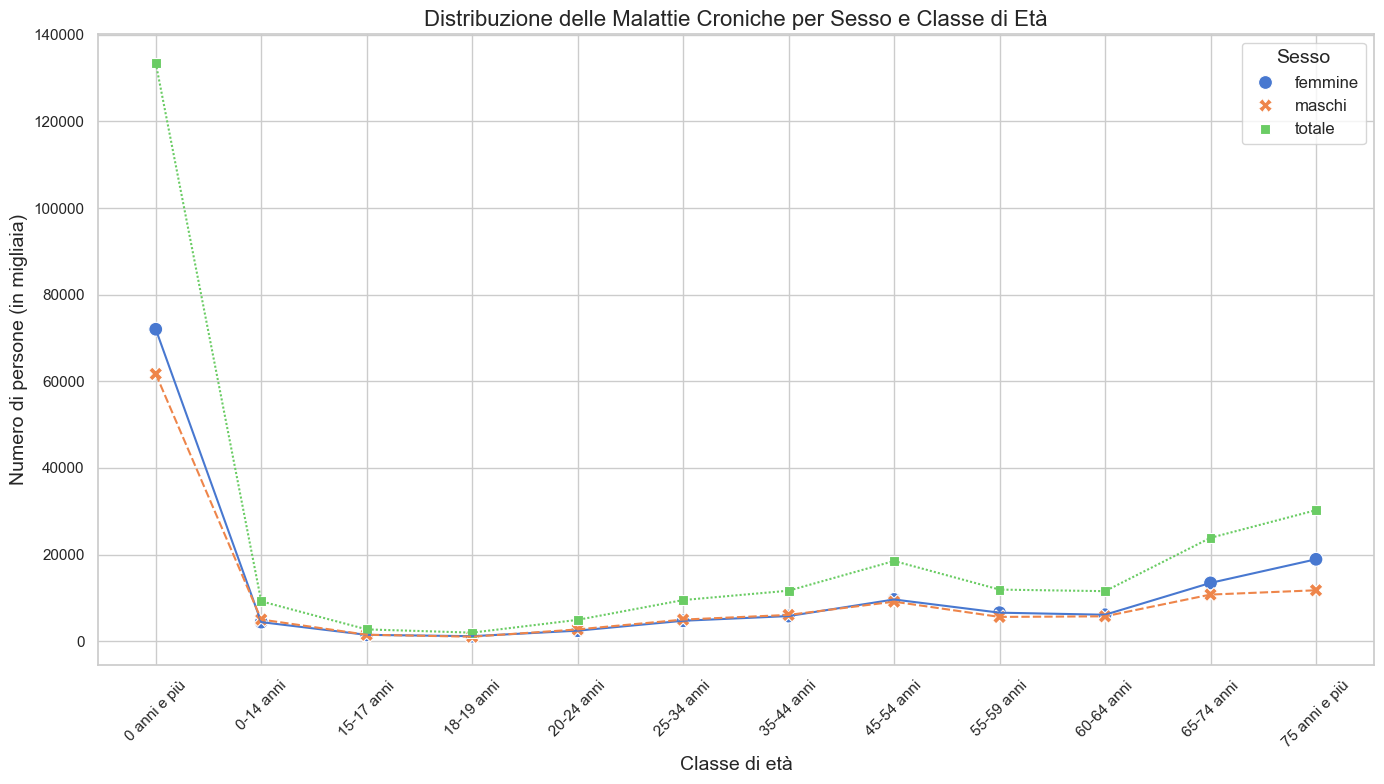

In [143]:
# Display the first few rows of the dataframe to understand its structure
df_stato_salute.head()

# Raggruppa i dati per sesso e classe di età
df_grouped = df_stato_salute.groupby(['Sesso', 'Classe di età'])['Value'].sum().reset_index()

# Imposta lo stile del grafico
sns.set(style="whitegrid")

# Crea un grafico a dispersione con linee di collegamento
plt.figure(figsize=(14, 8))
sns.scatterplot(data=df_grouped, x='Classe di età', y='Value', hue='Sesso', style='Sesso', s=100, palette='muted')
sns.lineplot(data=df_grouped, x='Classe di età', y='Value', hue='Sesso', style='Sesso', palette='muted', legend=None)

# Aggiunge etichette e titolo
plt.xlabel('Classe di età', fontsize=14)
plt.ylabel('Numero di persone (in migliaia)', fontsize=14)
plt.title('Distribuzione delle Malattie Croniche per Sesso e Classe di Età', fontsize=16)
plt.legend(title='Sesso', fontsize=12, title_fontsize=14)
plt.xticks(rotation=45)

# Mostra il grafico
plt.tight_layout()
plt.show()

### Distribuzione dell'Uso dei Farmaci per Sesso e Classe di Età
L'analisi dell'uso dei farmaci rivela differenze significative tra i sessi e le diverse fasce di età. Si osserva un aumento dell'uso dei farmaci nelle fasce di età più anziane, con una distribuzione differenziata tra uomini e donne. Questo solleva questioni importanti sulla gestione delle condizioni di salute e sull'accesso ai servizi sanitari, richiedendo politiche e interventi volti a garantire un uso appropriato e sicuro dei farmaci.


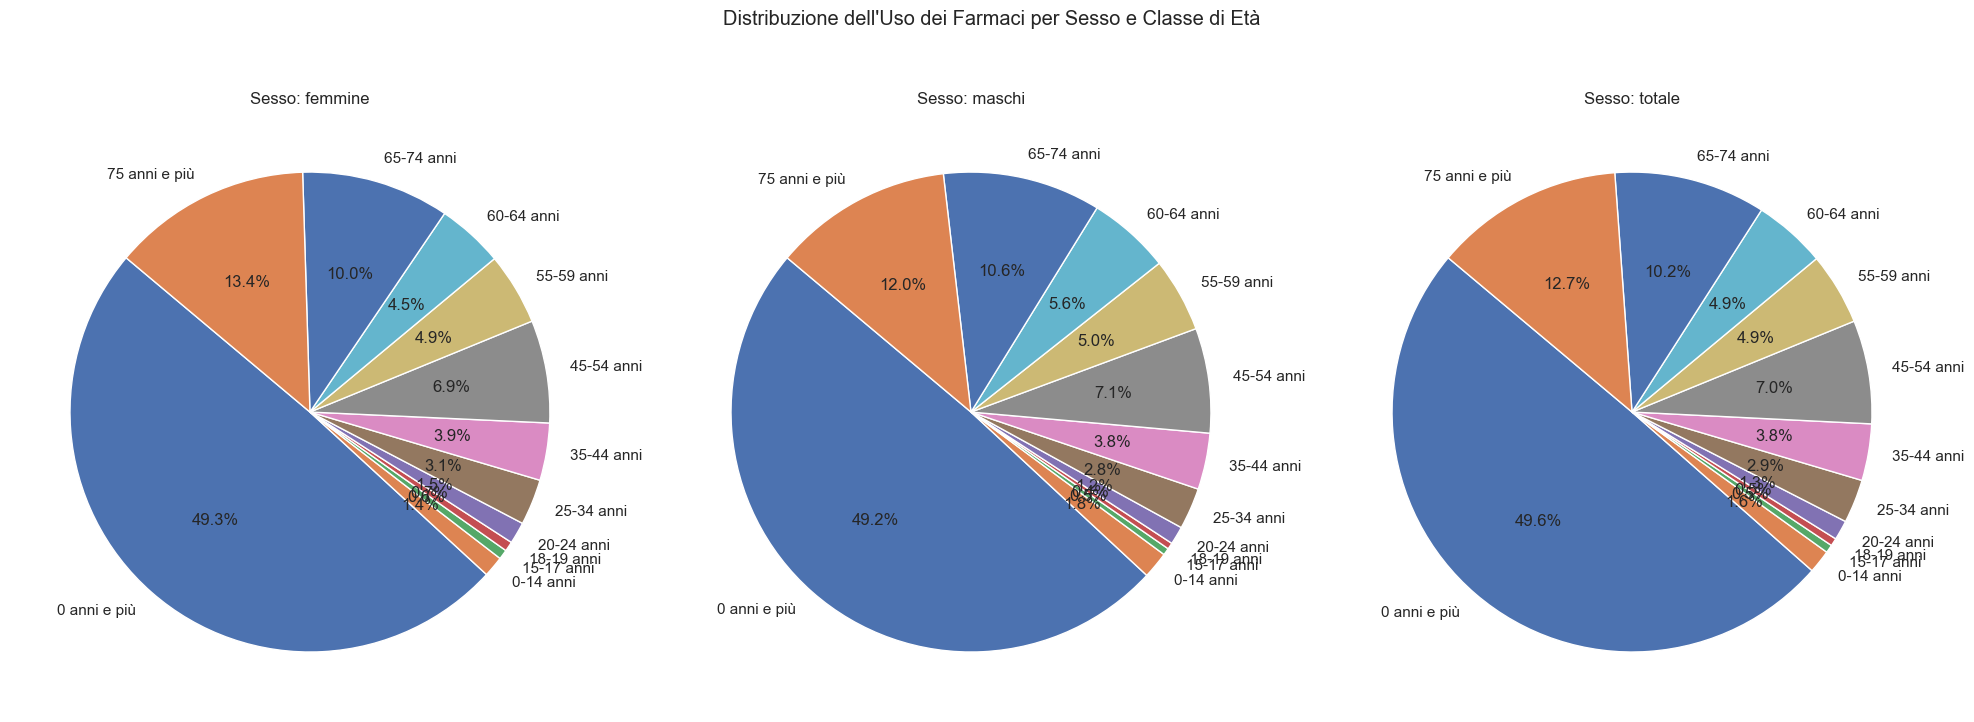

In [144]:
# Display the first few rows of the dataframe to understand its structure
df_farmaci.head()

# Raggruppa i dati per sesso e classe di età
df_grouped = df_farmaci.groupby(['Tipo dato', 'Sesso', 'Classe di età'])['Value'].sum().reset_index()

# Imposta lo stile del grafico
sns.set(style="whitegrid")

# Raggruppa i dati per sesso e classe di età
df_farmaci_grouped = df_farmaci.groupby(['Sesso', 'Classe di età'])['Value'].sum().reset_index()

# Crea grafici a torta per ciascun sesso
sexes = df_farmaci_grouped['Sesso'].unique()
fig, axes = plt.subplots(1, len(sexes), figsize=(20, 8), subplot_kw=dict(aspect="equal"))

for i, sex in enumerate(sexes):
    data = df_farmaci_grouped[df_farmaci_grouped['Sesso'] == sex]
    axes[i].pie(data['Value'], labels=data['Classe di età'], autopct='%1.1f%%', startangle=140)
    axes[i].set_title(f'Sesso: {sex}')

plt.suptitle('Distribuzione dell\'Uso dei Farmaci per Sesso e Classe di Età')

# Mostra il grafico
plt.tight_layout()
plt.show()

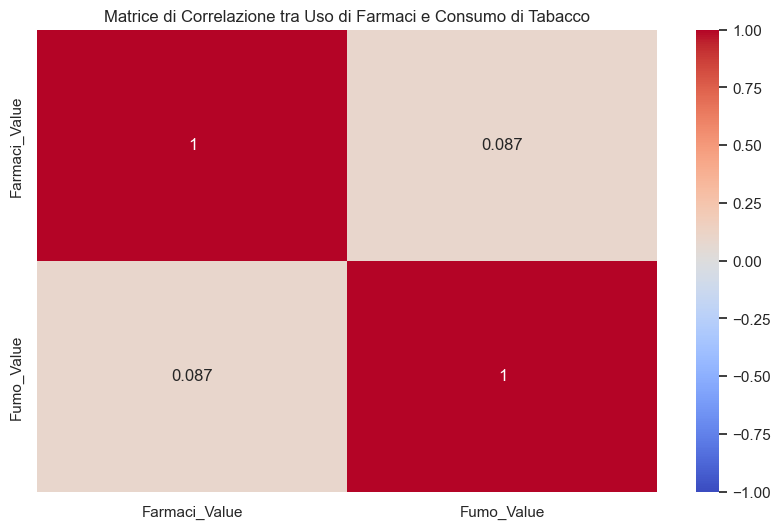

               Farmaci_Value  Fumo_Value
Farmaci_Value       1.000000    0.087338
Fumo_Value          0.087338    1.000000


In [145]:
# Esempio di matrice di correlazione

# Carica i dati dai file CSV
df_farmaci = pd.read_csv('dataset\\farmaci.csv', encoding='utf-8', delimiter=',')
df_fumo = pd.read_csv('dataset\\fumo.csv', encoding='utf-8', delimiter=',')

# Pulisce e seleziona le colonne necessarie per l'analisi
df_farmaci_cleaned = df_farmaci[['Sesso', 'Classe di età', 'TIME', 'Value']].rename(columns={'Value': 'Farmaci_Value'})
df_fumo_cleaned = df_fumo[['Sesso', 'Classe di età', 'TIME', 'Value']].rename(columns={'Value': 'Fumo_Value'})

# Unisce i dataset sulla base di sesso, classe di età e anno
merged_df = pd.merge(df_farmaci_cleaned, df_fumo_cleaned, on=['Sesso', 'Classe di età', 'TIME'])

# Calcola la matrice di correlazione
correlation_matrix = merged_df[['Farmaci_Value', 'Fumo_Value']].corr()

# Visualizza la matrice di correlazione con una heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matrice di Correlazione tra Uso di Farmaci e Consumo di Tabacco')
plt.show()

# Restituisce la matrice di correlazione per determinare la positività della correlazione
print(correlation_matrix)

### Conclusione
Dallo studio delle abitudini legate alla salute e all'alimentazione emergono tendenze significative che possono influenzare le politiche pubbliche e le strategie di intervento. Il declino nel consumo di tabacco, le variazioni nel consumo di bevande alcoliche e cibi, e le differenze nell'uso dei farmaci tra i sessi e le diverse fasce di età, evidenziano la necessità di programmi di prevenzione e promozione della salute mirati. Inoltre, l'analisi dell'indice di massa corporea e delle malattie croniche suggerisce l'importanza di interventi per promuovere stili di vita sani e prevenire l'obesità e le malattie correlate. Queste informazioni sono fondamentali per guidare la pianificazione delle risorse sanitarie e migliorare la salute della popolazione.